##Импорт данных в датафрейм и подготовка к обучению модели

Были импортированы все необходимые библиотеки для работы - numpy (далее - np), pandas (далее - pd), sklearn, matplotlib.pyplot. Для построения модели линейной регрессии был считан файл time_messagees.csv через метод pandas.read_csv. Данные разделены через запятую, поэтому были считаны методом без дополнительного указания разделителя. Так как столбцы не содержат заголовков, чтобы избежать считывания первой строки данных как заголовков столбцов, необходимо указать None в параметр header метода read_csv. Для визуализации корректности считания данных были выведены десять первых строк датафрейма через df.head().

In [184]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
df = pd.read_csv('time_messagees.csv', header = None)
df.columns = ['time', 'messages']
df.head(10)

,time,messages
0,00:00:00,0.0
1,00:00:01,1.0
2,00:00:02,0.0
3,00:00:03,6.0
4,00:00:04,7.0
5,00:00:05,0.0
6,00:00:06,1.0
7,00:00:07,2.0
8,00:00:08,0.0
9,00:00:09,0.0


Так как регрессия исследуется по числовым данным, необходимо было изменить данные из столбца time. На момент считывания time - столбец со строками формата часы:минуты:секунды. В datetime мной не было найдео встроенной функции, вычисляющей конкретно ординал времени, поэтому было принято решение написать функцию, которая делает именно это, получая на вход строку - умножающая количество часов на 60 * 60, а количество минут на 60, чтобы получить точное значение в секундах для каждой строки такого формата. Отсюда и получается ординал даты, где разница в единицу означала бы разницу в 1 секунду между двумя записями. Это имеет смысл в рамках данной задачи из-за того, что данные по времени не содержат повторений и представляют из себя набор разных показателей времени в течение суток.

In [185]:
def time_ordinal(str_time):
  hh, mm, ss = map(int, str_time.split(":"))
  return hh * 60 * 60 + mm * 60 + ss
df['time'] = df['time'].apply(time_ordinal)
df.head(10)

,time,messages
0,0,0.0
1,1,1.0
2,2,0.0
3,3,6.0
4,4,7.0
5,5,0.0
6,6,1.0
7,7,2.0
8,8,0.0
9,9,0.0


В результате вместо времени в формате часы:минуты:секунды в каждой записи содержится значение прошедшего времени с начала суток в секундах.

##Обучение модели линейной регрессии

In [186]:
model = linear_model.LinearRegression()
time = np.array(df['time'])
messages = np.array(df['messages'])
model = model.fit(time.reshape(-1, 1), messages)

In [187]:
messages_predicted = model.predict(time.reshape(-1, 1))
import sklearn.metrics as skm

print(skm.r2_score(messages, messages_predicted), skm.mean_squared_error(messages, messages_predicted))

0.0044706428147380795 365.3979914140091


Модель была обучена линейной регрессии по time и messages, после чего было совершено предсказание по той же тренировочной выборке time. Исходя из очень плохих результатов вычисления метрик регрессии (низкого r2 (коэффициента детерминации) и высокого MSE) можно полагать о том, что модель очень плохо предсказывает данные. Ниже показан график, где точки - истинные данные, а линия - линия регрессии, построенная по предсказанным щанным

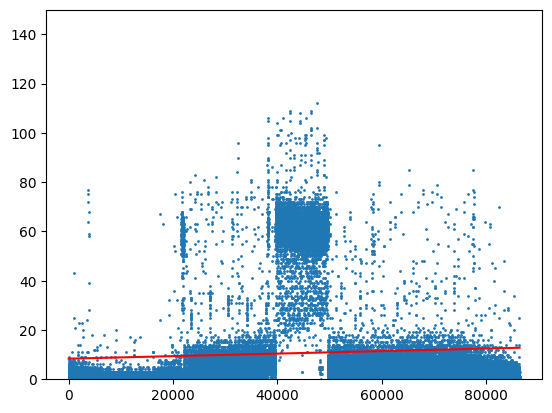

In [189]:

plt.scatter(time, messages, s = 1)
plt.plot(time, messages_predicted, color = 'red')
plt.ylim(0, 150)
plt.show()

Исходя из этого можно сделать вывод, что линейная регрессия не подходит для анализа такого типа данных, так как между между временем и количеством сообщений в эту секунду нет линейной связи. Это подтверждается, если использовать вид регрессии, который может вернуть график, более похожий на то, как выглядят на области истинные значения, например, полиномиальную регрессию. Ниже показано обучение модели полиномиальной регрессии (в степени 4) и построен график с точками истинных значений и линией регрессии. Также были выведены метрики R2 и MSE - по ним видно, что модель все еще плохо предсказывает данные, но метрики значительно лучше, чем при линейной регрессии (что видно и по графику - линия регрессии здесь гораздо больше похожа на точки истинных значений).

0.2671657465326921 268.9786718228417


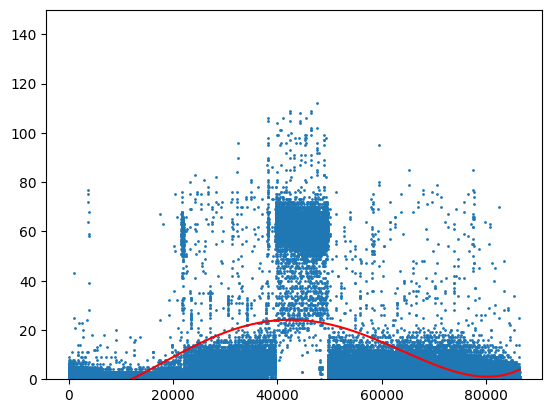

In [190]:
from sklearn.preprocessing import PolynomialFeatures

time_poly = PolynomialFeatures(degree = 4).fit_transform(time.reshape(-1, 1))
model_poly = linear_model.LinearRegression().fit(time_poly, messages)

messages_predicted_poly = model_poly.predict(time_poly)

r2_poly = skm.r2_score(messages, messages_predicted_poly)
mse_poly = skm.mean_squared_error(messages, messages_predicted_poly)

print(r2_poly, mse_poly)

plt.scatter(time, messages, s = 1)
plt.plot(time, messages_predicted_poly, color = "red")
plt.ylim(0, 150)
plt.show()